# Topic 21: Object-Oriented Programming 

- onl01-dtsc-ft-022221
- 04/27/21

## Questions?


- 

## Topics

- **OOP-Vocabulary**
- **Defining/Initializing Classes**
- **Inspecting classes:**
    - `help(obj)` vs `dir(obj)`
    
- **Deeper dive into Classes/Objects**
    - special methods/properties (`__repr__(),__str__(),__call__(),__version__(),__name__()`)
    - Methods: vs Bound Methods vs Static Methods 
    
- **Extended Activity: Building a Deck of PlayingCards**

# What does it mean to be 'Object-Oriented'?

> ### ___"Everything is an object."___
- some Python sensei


- Any function, method, class, variable are ALL objects. 
    - Built from a template Class
    - Can be stored in memory under any name 

In [26]:
prove_it = print
prove_it

<function print>

In [27]:
prove_it("This is now equal to print.")

This is now equal to print.


In [30]:
help(prove_it)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [32]:
prove_it.__name__

'print'

# OOP VOCABULARY


#### VOCAB RELATED TO FUNCTIONS:

- **Function: A resuable, fleixbile block of code that runs a process**  

    - Parameters: inputs that are expected by python/that function
    
    - Argument: the actual value/variable passed into the function. 
        - Positional Argument:
        - Keyword/default Arguments:

- "Calling" a function: `( )`

In [46]:
def my_func(posarg1,posarg2, kwarg1='example',kwarg2='example2'):
    print('positional arguments:')
    print(f"    {posarg1}, {posarg2}")
    
    print("keyword arguments:")
    print(f"    kwarg1={kwarg1}")
    print(f"    kwarg2={kwarg2}")

In [47]:
my_func

<function __main__.my_func(posarg1, posarg2, kwarg1='example', kwarg2='example2')>

In [48]:
my_func(1,2)

positional arguments:
    1, 2
keyword arguments:
    kwarg1=example
    kwarg2=example2


#### VOCAB RELATED TO CLASSES:

- "Object": 
- **Class:** 
- Instance: 
- Attribute:
- Method:
- Private Attributes/Methods: 
- Getters/Setters:


- Object: 

- "dunders" = double underscores __ 

# Defining and Initializing Classes


- Use `class NewClassName():` like you use `def function_name():` for functions.
    - the `()` are optional for classes. (used to inherit other classes, more on that later)

#### Naming Classes
    
- Convention for naming classes = `UpperCamelCase`
- Convention for naming function = `snake_case`

In [1]:
## Bare minimum to define a class.
class PlayingCard:
    pass

## Attributes and Methods

- Attribute: a variable is stored inside a class/object

- Method: a function that is stored inside of and (usually) operates on the object/class

## What makes a PlayingCard?

***Card:***
- *Value / Name*:
    - 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K, A
- *Suit*:
    - Hearts (H), Spades(S), Clubs(C), Diamonds(D) 
- *Color*:
    - black or red

In [5]:
class PlayingCard:
    value = 2
    suit = 'S'
    color = 'black'
    
card = PlayingCard()
card

In [6]:
## Print out both in one statement
print(f"{card.value} of {card.suit}")

2 of S


> Let's add a `.flip` method that will print the value and suit. 
- Let's also make `2`,`S`,`black` the default value, suit, and color.

In [10]:
## clean for sg
class PlayingCard:
    value = 2
    suit = 'S'
    color = 'black'
    
    def flip():
        print(f"{value} of {suit}")
        
card = PlayingCard()
card.flip()

TypeError: flip() takes 0 positional arguments but 1 was given

### Know thy `self`
- Because Methods are designed to operate on the `object_its.attached_to()`, Python automatically gives every method a copy of instance its attached to, which we call `self`
- We have to pass `self` as the first parameter for every method we make.
- Otherwise it will think that the first thing we give it is actually itself. This will cause an *existential crisis** and corresponding error.

In [16]:
## clean for sg
class PlayingCard:
    value = 2
    suit = 'S'
    color = 'black'
    
    def flip(self):
        print(f"{self.value} of {self.suit}")
        

In [17]:
card = PlayingCard()
card

In [18]:
card.flip()

2 of S


## Initialization 


- We create an instance by setting a `instance = ClassName()`
-  This uses the template `ClassName` to create an instance of the class ( which we named `instance`)

### `__init__`

- What if we don't want to set the attributes in stone for every Car but want to let the programmer determine that whenever a new Car is made?

> - When an instance is `initialized`, we `call` it using `()`, which runs a default `__init__()` method.

In [23]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        ## Set teh value and suit
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }

        ## Setting attributes
        self.name = name
        self.value = value_dct[name]
        self.suit = suit#suit_lookup[input_suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'

            
    def flip(self):
        print(f'{self.name} of {self.suit}')

In [24]:
card = PlayingCard('A','S')
card

In [25]:
card.flip()

A of S


## [Move?] Inheritance

- Define a Class based on another class by passing the class to inherit from as a parameter:

In [ ]:
class Truck(Car):
    
    pass

In [ ]:
help(Truck)

### What did you inherit?    

- To view all of the attributes and methods of a class, **use the help() command**
    -  Note: There is often ***information in `help()` that you may not be able to find ANYWHERE else*** and does not show up in documentation.

#### Peeking Under the Hood: `help` and `dir`

# Special Class Methods

#### Special Methods

It is common for a class to have magic methods. These are identifiable by the "dunder" (i.e. **d**ouble **under**score) prefixes and suffixes, such as `__init__()`. These methods will get called **automatically**, as we'll see below.

For more on these "magic methods", see [here](https://www.geeksforgeeks.org/dunder-magic-methods-python/).

## Using special methods to control the output of a class

In [26]:
display(card)
card

### `__repr__()` controls display when final element of a cell (or when display is used)

In [27]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        ## Set teh value and suit
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }

        ## Setting attributes
        self.name = name
        self.value = value_dct[name]
        self.suit = suit#suit_lookup[input_suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'

            
    def flip(self):
        print(f'{self.name} of {self.suit}')
        
    def __repr__(self):
        return "A Playing Card"

In [29]:
card = PlayingCard('A','S')
card

A Playing Card

In [31]:
display(card)
card.flip()

A Playing Card

A of S


### `__str__()` controls whats displayed when an object is printed

In [51]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        suit_lookup = ['S','C','D','H']
        ## Set teh value and suit
#         suit_lookup = {'S':'Spades',
#             'C':'Clubs',
#             'D':'Diamonds',
#             'H':"Hearts"}

        value_lookup = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        if suit not in suit_lookup:
            raise Exception(f'Suit must be one of {suit_lookup}')

        if str(name) not in value_lookup.keys():
            raise Exception(f'name must be one of {value_lookup.keys()}')

        ## Setting attributes
        self.name = name
        self.value = value_lookup[name]
        self.suit = suit#suit_lookup[suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'

            
    def flip(self):
        print(f'{self.name} of {self.suit}')
        
    def __repr__(self):
        return "A Playing Card"
    
    def __str__(self):
        return "A Playing Card"

In [52]:
card = PlayingCard('J','D')
card

A Playing Card

In [53]:
print(card)
card.flip()

A Playing Card
J of D


### `__repr__()` vs. `__str__()`

`__repr__()` and `__str__()` are both designed to return string-representations of the object. But `__repr__()` focuses on minimizing ambiguity while `__str__()` focuses on readability. However, if your class has no `__str__()` method, it will fall back on `__repr__()` (if it exists!). For more on this distinction, see [this post](https://dbader.org/blog/python-repr-vs-str).

### Making Things More Interesting

-  Instead of "A Playing Card", let's be sneaky and use an image of card back.

<img src="card_back.png" width=100>

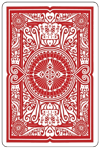

In [54]:
from PIL import Image
img = Image.open("card_back.png")
img.resize((100,150))

In [63]:
symbols = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}
symbols

{'S': '♠️', 'C': '♣️', 'D': '♦️', 'H': '♥️'}

In [67]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        ## Set the value and suit
        suit_lookup = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}

        value_lookup = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        if suit not in suit_lookup:
            raise Exception(f'Suit must be one of {suit_lookup}')

        if str(name) not in value_lookup.keys():
            raise Exception(f'name must be one of {value_lookup.keys()}')

        ## Setting attributes
        self.name = name
        self.value = value_lookup[name]
        self.suit = suit_lookup[suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'
        
        ## Save the card back
        self.back = Image.open("card_back.png").resize((100,150))

            
    def flip(self):
        print(f'{self.name} of {self.suit}')
        
    def __repr__(self):
        display(self.back)
        return ""#"A Playing Card"
    
    def __str__(self):
        display(self.back)
        return ""#"A Playing Card"

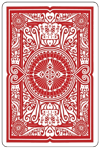

In [68]:
card = PlayingCard('J','D')
card

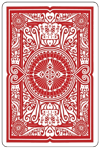


J of ♦️


In [69]:
print(card)
card.flip()

In [75]:
def make_ascii_card(name, suit):
    """Ascii Card adapted from: https://codereview.stackexchange.com/questions/82103/ascii-fication-of-playing-cards
    """
    symbols = {'S':'♠️','C':'♣️',
               'D':'♦️','H':'♥️'}
    suit_symbol = symbols[suit]
    if name == '10':
        space=''
    else:
        space = ' '

    # add the individual card on a line by line basis
    _ascii=[]
    _ascii.append('┌─────────┐')
    _ascii.append(f'│{name}{space}       │')#.format(rank, space))  # use two {} one for char, one for space or char
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│    {suit_symbol}   │') #.format(suit))
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│       {space}{name}│')#.format(space, rank))
    _ascii.append('└─────────┘')
    
    return '\n'.join(_ascii)
#     print('\n'.join(_ascii))


print(make_ascii_card('A','D'))

┌─────────┐
│A        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        A│
└─────────┘


In [77]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        ## Set the value and suit
        suit_lookup = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}

        value_lookup = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        if suit not in suit_lookup:
            raise Exception(f'Suit must be one of {suit_lookup}')

        if str(name) not in value_lookup.keys():
            raise Exception(f'name must be one of {value_lookup.keys()}')

        ## Setting attributes
        self.name = name
        self.value = value_lookup[name]
        self.suit = suit_lookup[suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'
        
        ## Save the card back
        self.back = Image.open("card_back.png").resize((100,150))
        self.face = make_ascii_card(name,suit)
            
    def flip(self):
        print(self.face)
#         print(f'{self.name} of {self.suit}')
        
    def __repr__(self):
        display(self.back)
        return ""#"A Playing Card"
    
    def __str__(self):
        display(self.back)
        return ""#"A Playing Card"

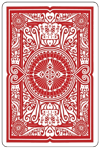

In [78]:
card = PlayingCard('Q','D')
card

In [79]:
card.flip()

┌─────────┐
│Q        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        Q│
└─────────┘


### `__gt__` & `__lt__`:


In [80]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, value, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(value)
        
        ## Set the value and suit
        suit_lookup = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}

        value_lookup = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        
        if suit not in suit_lookup:
            raise Exception(f'Suit must be one of {suit_lookup}')

        if str(name) not in value_lookup.keys():
            raise Exception(f'name must be one of {value_lookup.keys()}')

        ## Setting attributes
        self.name = name
        self.value = value_lookup[name]
        self.suit = suit_lookup[suit]
        self.color = 'black' if suit in ('S', 'C') else 'red'
        
        ## Save the card back
        self.back = Image.open("card_back.png").resize((100,150))
        self.face = make_ascii_card(name,suit)
            
    def flip(self):
        print(self.face)
#         print(f'{self.name} of {self.suit}')
        
    def __repr__(self):
        display(self.back)
        return ""#"A Playing Card"
    
    def __str__(self):
        display(self.back)
        return ""#"A Playing Card"
    
    
    def __gt__(self,other):
        return self.value > other.value

    def __lt__(self,other):
        return self.value < other.value

In [81]:
# Create one!
card1 = PlayingCard('10', 'H')
card1.flip()

┌─────────┐
│10       │
│         │
│         │
│    ♥️   │
│         │
│         │
│       10│
└─────────┘


In [82]:
card2 = PlayingCard('A', 'S')
card2.flip()

┌─────────┐
│A        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        A│
└─────────┘


In [83]:
card2 > card1

True

In [85]:
card2 < card1

False

## Now, let's Make a Deck of PlayingCards

### Overview - Whats in a Deck?

***A Deck***
- "a collection of Cards"
- can be shuffled

In [87]:
import numpy as np
class Deck:
    
    cards = []
    def __init__(self,shuffle=True):
        
        ## Make a complete deck
        cards_to_make = [str(i) for i in range(2,11)]
        cards_to_make.extend(['A','K','Q','J'])
        
        deck = []
        for value in cards_to_make:
            for suit in ['H','S','C','D']:
                deck.append(PlayingCard(value,suit))
        self.cards = deck

        if shuffle==True:
            self.shuffle()
    
    def shuffle(self):
        np.random.shuffle(self.cards)

    def __str__(self):
        return f"There are {len(self.cards)} cards in the deck."

    def __repr__(self):
        return self.__str__()
    
    ## Get
#     def __getitem__(self, index):
#         return self.cards[index]


In [88]:
deck = Deck()
deck

There are 52 cards in the deck.

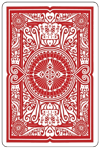

In [89]:
deck.cards[0]

In [91]:
deck[0]

TypeError: 'Deck' object is not subscriptable

###  `__get_item__`

In [90]:
import numpy as np
class Deck:
    
    cards = []
    def __init__(self,shuffle=True):
        
        ## Make a complete deck
        cards_to_make = [str(i) for i in range(2,11)]
        cards_to_make.extend(['A','K','Q','J'])
        
        deck = []
        for value in cards_to_make:
            for suit in ['H','S','C','D']:
                deck.append(PlayingCard(value,suit))
        self.cards = deck

        if shuffle==True:
            self.shuffle()
    
    def shuffle(self):
        np.random.shuffle(self.cards)

    def __str__(self):
        return f"There are {len(self.cards)} cards in the deck."

    def __repr__(self):
        return self.__str__()
    
    def __getitem__(self, index):
        return self.cards[index]


In [94]:
deck = Deck()
deck[1].flip()

┌─────────┐
│3        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        3│
└─────────┘


In [95]:
for card in deck:
    card.flip()

┌─────────┐
│8        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        8│
└─────────┘
┌─────────┐
│3        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        3│
└─────────┘
┌─────────┐
│3        │
│         │
│         │
│    ♣️   │
│         │
│         │
│        3│
└─────────┘
┌─────────┐
│A        │
│         │
│         │
│    ♥️   │
│         │
│         │
│        A│
└─────────┘
┌─────────┐
│3        │
│         │
│         │
│    ♥️   │
│         │
│         │
│        3│
└─────────┘
┌─────────┐
│8        │
│         │
│         │
│    ♥️   │
│         │
│         │
│        8│
└─────────┘
┌─────────┐
│A        │
│         │
│         │
│    ♣️   │
│         │
│         │
│        A│
└─────────┘
┌─────────┐
│2        │
│         │
│         │
│    ♦️   │
│         │
│         │
│        2│
└─────────┘
┌─────────┐
│3        │
│         │
│         │
│    ♠️   │
│         │
│         │
│        3│
└─────────┘
┌─────────┐
│A        │
│   

# Nice!

## To recap, we:

1. Built a Card object using `class`.
    - Used `__init__(self)` to set attributes and run processes when the object is created.
    - Created a method `flip(self)` which "flips the card over" (shows the name and suit).
    - Experimented with `__str__` and `__repr__`.

  
2. Built a Deck object that uses `Cards`!
    - Decks can `shuffle` and `shuffle_and_deal`.
    
---

There are some points which we missed for the sake of drawing up the example.

- We could clean up the Card functions for deciding what to do if a user tries to create a Card without a real `name` or `suit`.

- We also don't have a plan for what happens if the Deck uses `shuffle_and_deal` but doesn't have enough cards left!

___

# [Move?] Scikit Learn Objects

In [ ]:
## Getting the dataset ready
from fsds.imports import *
df= fs.datasets.load_iowa_prisoners()

df.fillna('MISSING',inplace=True)

drop_cols= [col for col in df.columns if 'New' in col]
drop_cols.append('Days to Recidivism')
df.drop(columns=drop_cols,inplace=True)
df.head()


In [ ]:
df.describe()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
## Standard Scaler
scaler = StandardScaler()
scaler

In [ ]:
df['scaled_year_released'] = scaler.fit_transform(df[['Fiscal Year Released']])
df[['scaled_year_released','Fiscal Year Released']]

In [ ]:
scaler.inverse_transform(df['scaled_year_released'])

In [ ]:
df['Fiscal Year Released']

In [ ]:
# df[['Fiscal Year Released']]

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

In [ ]:
encoders_dict= {}
for col in cat_cols:
    le = LabelEncoder()
    print(col)
    
    df[col] = le.fit_transform(df[col])
    encoders_dict[col] = le

In [ ]:
df

In [ ]:
encoders_dict['Sex'].inverse_transform(df['Sex'])

# Activity: Making a Deck of PlayingCards

## Overview - Building a Deck of Cards

### What makes a PlayingCard?

***Card:***
- *Strength / Value / Name*:
    - 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K, A
- *Suit*:
    - Hearts (H), Spades(S), Clubs(C), Diamonds(D) 
- *Color*:
    - black or red

In [1]:
class PlayingCard:
    value = None
    suit = None
    color = None

In [3]:
card = PlayingCard()
card.value = 2
card.suit = 'S'
card

In [11]:
card.value

2

In [12]:
card.suit

'S'

In [13]:
## Print out both in one statement
print(f"{card.value} of {card.suit}")

2 of S


> Let's add a `.flip` method that will print the value and suit. 
- Let's also make `2`,`S`,`black` the default value, suit, and color.

In [15]:
## clean for sg
class PlayingCard:
    value = 2
    suit = 'S'
    color = 'black'
    
    def flip(self):
        print(f"{self.value} of {self.suit}")

In [16]:
card = PlayingCard()
card

In [17]:
card.flip()

2 of S


#### Moving towards mass-production of cards

- Let's add an `init` method that will set the value, suit, and color. 

In [49]:
### https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
# from termcolor import colored
# print(colored('S','red'))


In [24]:
## clean for sg

class PlayingCard:
    
    def __init__(self,value,suit):
        self.value = value
        self.suit = suit
        self.color = 'black' if suit in ['S','C'] else 'red'
    
    def flip(self):
        print(f"{self.value} of {self.suit}")

In [51]:
card = PlayingCard(3, 'C')
card

In [52]:
card.flip()

3 of C


In [ ]:
## near-final class
class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    
    def __init__(self, name, suit):
        
        # Extracting information from name and suit that are relevant.
        name = str(name)
        input_suit = suit.upper()
        
        ## Set teh value and suit
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        suit_lookup = {'S':'Spades',
                'C':'Clubs',
                'D':'Diamonds',
                'H':"Hearts"}


        if suit not in suit_lookup.keys():
            raise Exception('Suit must be one of {}'.format(suit.keys()))

        if str(name) not in value_dct.keys():
            raise Exception('name must be one of {}'.format(value_dct.keys()))
        
        ## Setting attributes
        self.name = name
        self.value = value_dct[name]
        self.suit = suit_lookup[input_suit]
        self.color = 'Black' if input_suit in ('S', 'C') else 'Red'

            
    def flip(self):
        print(f'{self.name} of {self.suit}')

In [ ]:
card = PlayingCard('A','S')
card

In [ ]:
card.flip()

In [ ]:
card

## Final PlayingCard class

In [ ]:
def make_ascii(name, suit):
#     rank = self.name
#     suit = self.suit_symbol
    rank = name
    symbols = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}
    suit_symbol = symbols[suit]
    if name == '10':
        space=''
    else:
        space = ' '

    tabs = "\t"
    ## Ascii Card adapted from: https://codereview.stackexchange.com/questions/82103/ascii-fication-of-playing-cards
    # add the individual card on a line by line basis
    _ascii=[]
    _ascii.append('┌─────────┐')
    _ascii.append(f'│{rank}{space}       │')#.format(rank, space))  # use two {} one for char, one for space or char
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│    {suit_symbol}   │') #.format(suit))
    _ascii.append('│         │')
    _ascii.append('│         │')
    _ascii.append(f'│       {space}{rank}│')#.format(space, rank))
    _ascii.append('└─────────┘')
    
#     return '\n'.join(_ascii)
    print('\n'.join(_ascii))


make_ascii('A','S')

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img,array_to_img,img_to_array

class PlayingCard:
    """
    Create a Card object.
    `name` must be one of ('2', '3', '4', ..., 'J', 'Q', 'K', 'A')
    `suit` must be one of ('S', 'C', 'D', 'H')
    """
    

    def _make_ascii(self):
        rank = self.name
        suit = self.suit_symbol
        if self.name == '10':
            space=''
        else:
            space = ' '

        tabs = "\t"
        ## Ascii Card adapted from: https://codereview.stackexchange.com/questions/82103/ascii-fication-of-playing-cards
        # add the individual card on a line by line basis
        _ascii=[]
        _ascii.append('┌─────────┐')
        _ascii.append(f'│{rank}{space}       │')#.format(rank, space))  # use two {} one for char, one for space or char
        _ascii.append('│         │')
        _ascii.append('│         │')
        _ascii.append(f'│    {suit}   │') #.format(suit))
        _ascii.append('│         │')
        _ascii.append('│         │')
        _ascii.append(f'│       {space}{rank}│')#.format(space, rank))
        _ascii.append('└─────────┘')
        return '\n'.join(_ascii)

    def __init__(self, name, suit):
        # Extracting information from name and suit that are relevant.
        name = str(name)
        input_suit = suit.upper()
        value_dct = {
            '2': 2,'3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10,
            'J': 11,'Q': 12, 'K': 13, 'A': 14
            }
        suit_lookup = {'S':'Spades',
                'C':'Clubs',
                'D':'Diamonds',
                'H':"Hearts"}

        symbols = {'S':'♠️','C':'♣️','D':'♦️','H':'♥️'}
        
        if suit not in suit_lookup.keys():
            raise Exception('Suit must be one of {}'.format(suit.keys()))

        if str(name) not in value_dct.keys():
            raise Exception('name must be one of {}'.format(value_dct.keys()))
        else:
            ## Setting attributes
            self.name = name
            self.value = value_dct[name]
            self.suit = suit_lookup[input_suit]
            self.suit_symbol = symbols[input_suit]
            self.color = 'Black' if input_suit in ('S', 'C') else 'Red'


            try:
                # Get image to display
                url=None#'https://i.pinimg.com/originals/10/80/a4/1080a4bd1a33cec92019fab5efb3995d.png'
                img = Image.open(requests.get(url, stream=True).raw)
                self.back = img.resize((100,150))
                # self.face = f"{self.name} of {self.symbols[input_suit]}"
                self.face = self._make_ascii()
            except Exception as e:
#                 print(e)
                # print(input_suit)
                img = Image.open("card_back.png")
                self.back = img.resize((100,150))
                self.face = self._make_ascii()

    
    def __str__(self):
        display(self.back)
        return ''#self._make_ascii() #'A Card (__str__)'
    
    def __repr__(self):
        
        display(self.back)
        return ''
        
    def flip(self):
        print(self.face)
        return None#self.face #f'{self.name} of {self.suit}'

    def __gt__(self,other):
        return self.value > other.value

    def __lt__(self,other):
        return self.value < other.value

In [ ]:
card =  PlayingCard('10', 'H')
print(card)
card.flip()

In [ ]:
# Create one!
card1 = PlayingCard('10', 'H')
card1.flip()

In [ ]:
# Create one!
card2 = PlayingCard('A', 'S')
card2.flip()

In [ ]:
card1 < card2

## Overview - Whats in a Deck?

## Deck

***A Deck***
- "a collection of Cards"
- can be shuffled

### Final Deck class

In [ ]:
import numpy as np
class Deck:
    
    cards = []
    def __init__(self,shuffle=True):
        
        cards_to_make = [str(i) for i in range(2,11)]
        cards_to_make.extend(['A','K','Q','J'])
        deck = []
        for value in cards_to_make:
            for suit in ['H','S','C','D']:
                deck.append(PlayingCard(value,suit))
        self.cards = deck
        self.n = 0

        if shuffle==True:
            self.shuffle()
    
    def shuffle(self):
        np.random.shuffle(self.cards)

    def __str__(self):
        return f"There are {len(self.cards)} cards in the deck."

    def __repr__(self):
        return self.__str__()
    
    ###__iter__ and __next___ code adapted from:
    ## source: https://www.programiz.com/python-programming/iterator
#     def __iter__(self):
#         self.n = 0
#         return self

#     def __next__(self):
#         if self.n < len(self.cards):
#             # result = 2 ** self.n
#             result = self.cards[self.n]
#             self.n += 1
#             return result
#         else:
#             raise StopIteration

    def __getitem__(self, index):
        return self.cards[index]


In [ ]:
# impo
deck = Deck()
deck

In [ ]:
deck.cards[0]

In [ ]:
deck[0]

In [ ]:
deck[0].flip()

In [ ]:
for card in deck:
    card.flip()

In [ ]:
display(deck)
# [card.flip() for card in deck.cards];

In [ ]:
list(deck)

# Nice!

## To recap, we:

1. Built a Card object using `class`.
    - Used `__init__(self)` to set attributes and run processes when the object is created.
    - Created a method `flip(self)` which "flips the card over" (shows the name and suit).
    - Experimented with `__str__` and `__repr__`.

  
2. Built a Deck object that uses `Cards`!
    - Decks can `shuffle` and `shuffle_and_deal`.
    
---

There are some points which we missed for the sake of drawing up the example.

- We could clean up the Card functions for deciding what to do if a user tries to create a Card without a real `name` or `suit`.

- We also don't have a plan for what happens if the Deck uses `shuffle_and_deal` but doesn't have enough cards left!

# APPENDIX

## Old Activity: Construct a Timer Class

In [ ]:
import tzlocal
import datetime as dt
tzlocal.get_localzone()

In [ ]:
dt.datetime.now()

In [ ]:
print(dt.datetime.now().strftime('%m/%d/%Y - %I:%M:%S %p'))

In [ ]:
from fsds.imports import *
fs.quick_refs.ts_date_str_formatting()

In [ ]:
class Timer:
    
    def __init__(self,fmt='%m/%d/%Y - %I:%M:%S %p',start=True,label=''):
        import tzlocal
        import datetime as dt
        self._tz = tzlocal.get_localzone()
        self._fmt = fmt
        
        if start:
            self.start()
        
        
    def _get_time(self):
        import datetime as dt
        return dt.datetime.now(tz=self._tz)

        
        
    def start(self,label=''):
        self._start = self._get_time()
        print(f'[i] Timer started at {self._start.strftime(self._fmt)}')

    def stop(self,label=''):
        self._stop = self._get_time()
        elapsed = self._stop - self._start
        
        print(f'[i] Timer stopped at {self._stop.strftime(self._fmt)}')
        print(f"\t- The process {label} took {elapsed}.")

    def __call__(self):
        print(self._get_time())
        
    


In [ ]:
timer = Timer()

In [ ]:
timer()

In [ ]:
timer.start()
# timer._start

In [ ]:
# dir(timer)
timer.start()#'Testing this thing')

In [ ]:
timer.stop()#@'Testing this other thing')

In [ ]:
timer()

### Running the Model with the Timer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target='Recidivism - Return to Prison'
y = df[target].copy()
X = df.drop(target,axis=1).copy()

X_train, X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tree = RandomForestClassifier()


params = {'max_depth':[0,4,6,10,20]}
grid = GridSearchCV(tree,params)

timer =Timer(start=True)#,label='Training Decision Tree Classifier')

grid.fit(X_train, y_train)

y_hat_test = grid.predict(X_test)
acc = accuracy_score(y_test,y_hat_test)
timer.stop()#f'- Training complete. Accuracy = {acc}')
acc

In [ ]:
help(GridSearchCV)

In [ ]:
help(tree)

In [ ]:
grid.best_score_

## Dictionaries & Dictionary Methods

- Iterating throught a dict:
    - `dict.items()`
    - `dict.keys()`
    - `dict.values()`
    - `**dict` vs `*dict`

- Retrieving Value:
    - `dict.get(k)` vs `dict[k]`

- Removing / Extracting Entries
    - `dict.pop(k)` vs `del dict[k]`
    - `dict.clear()`
    
- Merging Dictionaries:
    - `d1.update(d2)`
        - for every (k,v) in d2"
            - if k is NOT in d1, insert (k,v) into d1
            - if k IS in d1, updates value of k in d1
    - Use `**` operator:
        - `combined_d = {**d1,**d2}`
    
- Updating Dictionaries
    - `d1.update(key1=new_value1,new_key2=new_value2)`

- Setting Dictionary Values
    - `dict[k] = 5`
    - `dict.setdefault(k,5)`


## Decorators with Classes
#### Some special decorators used in classes.

1. `@staticmethod`:
    - Defines a method that does not get passed `self` when its called and can act on external code as if it was a function, not a "`bound method`"
2. `@classmethod`:
    - Specifies a method that should always refer to the default method spelled out in the class definition, NOT the version of it that is stored inside the **instance** of a method.
3. `@property`: (see example class `EncryptedPassword` below.)
    - Specifies that a function is going to determine the value of the `class.property`:
    - Essentially replaces the property name with a getter function to determine that value.
    - Use '@property.setter' above another function to define it as the setter function. 

### Vocab (completed)

- "Object" is an instance of a template class that currently exists in memory
- "Calling" a function: 
    - When we use `( )` with a function we are calling it.

- **Function:**  Codes that maniuplates data in a useful way. 

- Parameters: the defined data/varaibles that are passed accepted by a function
- Argument: the actual variable/value passed in for a parameter
- Positional Argument:
    - The first arguments required
    - their id is determined by their order
- Keyword/default Arguments:
    - arugments that have a defined default value
    - must come after positional arguments

<br><br>
- **Class:** Template/blue print.
- Instance: Ab object built from the class blueprint
- Attribute: A variable stored inside an object. 
- Method: Functions are stored inside an object.
    - Objects always pass themselves into a method, so we used `self` to account for this.
- Private Attributes/Methods: they start with _ and are hidden from the user. They can be updated using getting and setting functions.
- Getters/Setters:
    - Methods for retreiving or changing private attributes

- Object: 

- "dunders" = double underscores __ 

## Completed Timer

In [ ]:
class Car():
    """Automotive object"""
    ## Attributes
    moving = False

    ## Methods
    def __init__(self,wheels=4,doors=4):
        self.wheels = wheels
        self.doors = doors
    
    
    def go(self):                   # These are methods we can call on *any* car.
        print('It\'s going!')
        self.moving = True
    
    def stop(self):
        print('Stopped.')
        self.moving = False
        
    def __repr__(self):
        info = [f"- Wheels: {self.wheels}"]
        info.append(f"- Doors: {self.doors}")
        info.append(f"- Moving?: {self.moving}")
        return '\n'.join(info)
    
    def __str__(self):
        return f"""- This car has {self.wheels} wheels, {self.doors} doors, and moving = {self.moving}"""